In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import os
from typing import Dict
import pickle
from scipy.stats import linregress


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.2
    plt.rcParams["grid.linestyle"] = "-"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 16
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 18

    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']

# Call once at the top of your script
set_default_plot_style()


In [86]:
# Helpful funcs
def log_b(x, b):
    return np.log(x) / np.log(b)


In [95]:
L_vals = [4000, 8000, 16000, 20000]

epdilon_vals = [0.2943, 0.2944, 0.2945, 0.2946, 0.2947]

time_prefact = 100

num_initial_conds = 2000
initial_state_prob = 0.5

time_step = 10

cmap = plt.colormaps.get_cmap("Oranges").resampled(len(epdilon_vals) + 5)
cmap2 = plt.colormaps.get_cmap("Blues").resampled(len(L_vals) + 5)


read_external_drive = True
write_external_drive = read_external_drive and True
local_data_parent_folder = "data"
if read_external_drive:
    data_parent_folder = "/Volumes/ExternalData/stavskya_mc/data"
    if write_external_drive:
        local_data_parent_folder = "/Volumes/ExternalData/stavskya_mc/data"
else:
    data_parent_folder = local_data_parent_folder


In [94]:
# If first time

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    for epdilon in epdilon_vals:
        print(f"L_val: {L_val} | epsilon: {epdilon}")
        epsilon_val_name = f"{epdilon}".replace(".", "p")

        current_rhos = np.array([[0.0 for _ in range(L_val * time_prefact // time_step)] for _ in range(num_initial_conds)])
        for init_cond in range(1, num_initial_conds+1):
            sample_filepath_name = os.path.join(data_parent_folder, f"rho_per_time/IC1/L{L_val}/IC1_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}_sample{init_cond}.csv")
            try:
                df = pd.read_csv(sample_filepath_name)

                current_rhos[init_cond-1] = df.rho
            except Exception as e:
                print(e)
                print(sample_filepath_name)
        
        collected_rhos[L_val][epdilon] = np.mean(current_rhos.T, axis=1)
        collected_rho_stds[L_val][epdilon] = np.std(current_rhos.T, axis=1)

        pickle_path = os.path.join(local_data_parent_folder, f"rho_per_time/IC{num_initial_conds}/L{L_val}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}")
        dir_path = os.path.dirname(pickle_path)
        os.makedirs(dir_path, exist_ok=True)
        
        with open(pickle_path + "mean.pickle", "wb") as f:
            pickle.dump(collected_rhos[L_val][epdilon], f)
        with open(pickle_path + "stds.pickle", "wb") as f:
            pickle.dump(collected_rho_stds[L_val][epdilon], f)

L_val: 8000
L_val: 8000 | epsilon: 0.2943
L_val: 8000 | epsilon: 0.2944
L_val: 8000 | epsilon: 0.2945
L_val: 8000 | epsilon: 0.2946
L_val: 8000 | epsilon: 0.2947


In [66]:
sample_filepath_name

'/Volumes/ExternalData/stavskya_mc/data/rho_per_time/IC1/L8000/IC1_L8000_epsilon0p2946_timepref100_sample2.csv'

## If you have already processed and saved the data as pickled

In [96]:

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}
    for epdilon in epdilon_vals:
        epsilon_val_name = f"{epdilon}".replace(".", "p")
        pickle_path = os.path.join(local_data_parent_folder, f"rho_per_time/IC{num_initial_conds}/L{L_val}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}")
        
        with open(pickle_path + "mean.pickle", "rb") as f:
            collected_rhos[L_val][epdilon] = pickle.load(f)
        with open(pickle_path + "stds.pickle", "rb") as f:
            collected_rho_stds[L_val][epdilon] = pickle.load(f)

L_val: 4000
L_val: 8000
L_val: 16000
L_val: 20000


In [97]:
collected_rhos[L_vals[0]][epdilon_vals[0]] == collected_rhos[L_vals[0]][epdilon_vals[1]]

array([False, False, False, ..., False, False, False], shape=(40000,))

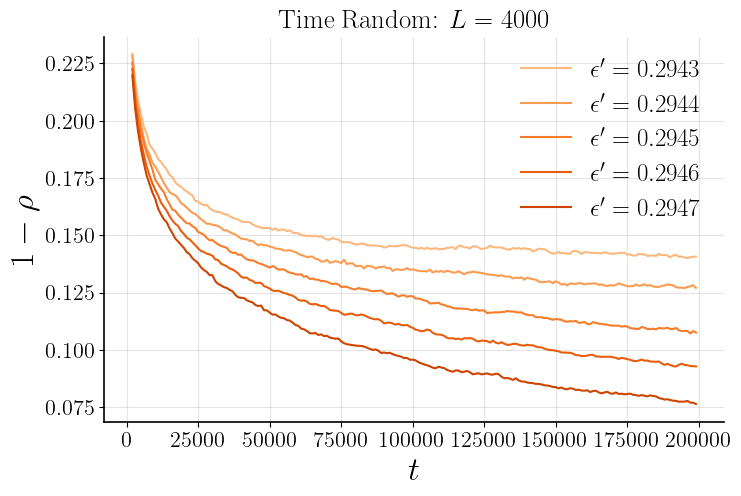

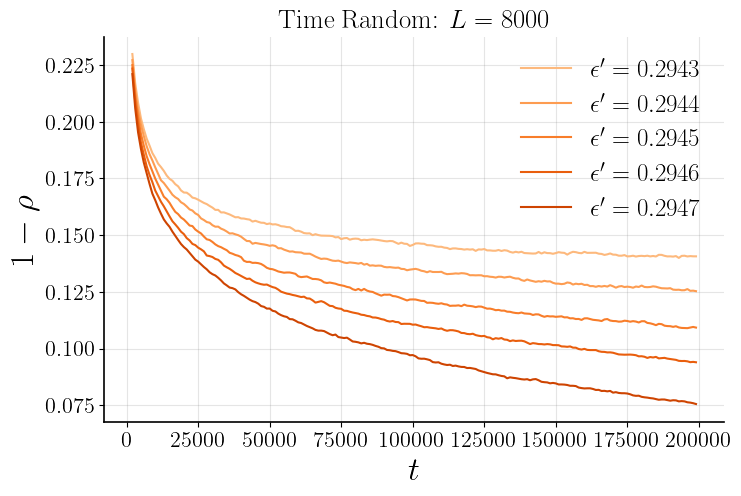

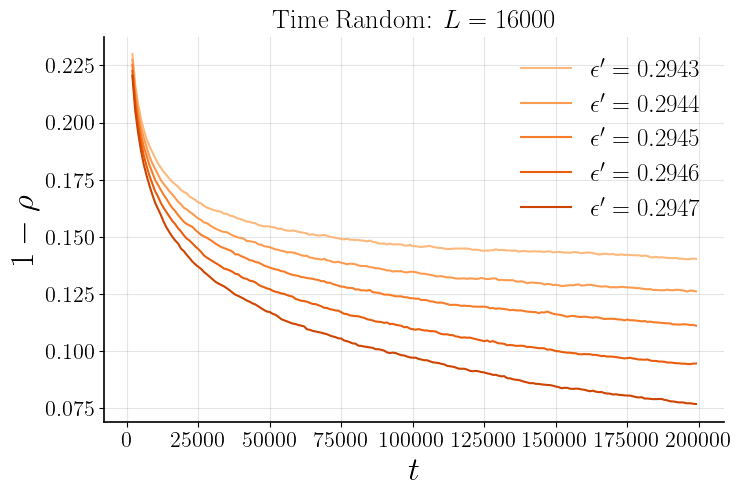

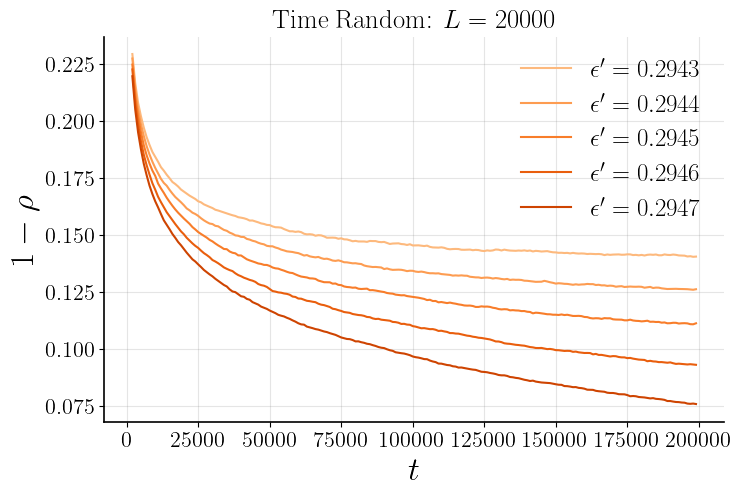

In [99]:

for j, L in enumerate(L_vals):
    plt.figure(figsize=(8,5))

    for i, epsilon_val in enumerate(epdilon_vals):
        c = cmap(i+3)
        time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
        plt.plot(
            time_vals[200:20000:100], 
            1-collected_rhos[L][epsilon_val][200:20000:100], 
            label = fr"$\epsilon' = {epsilon_val}$",
            # fmt='--',  
            # markersize=3,
            # marker = "o",
            # capsize=3,
            c=c
            )
    
    # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
    plt.title(fr"Time Random: $L = {L}$")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$1 - \rho$")
    plt.legend()

    plt.show()


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_95143/1767133494.py:7: RuntimeWarning: divide by zero encountered in log
  log_time_vals = np.log(np.array(time_vals))


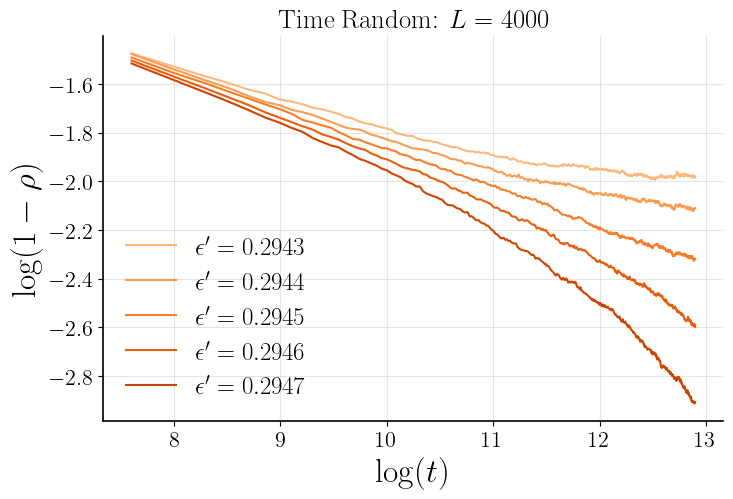

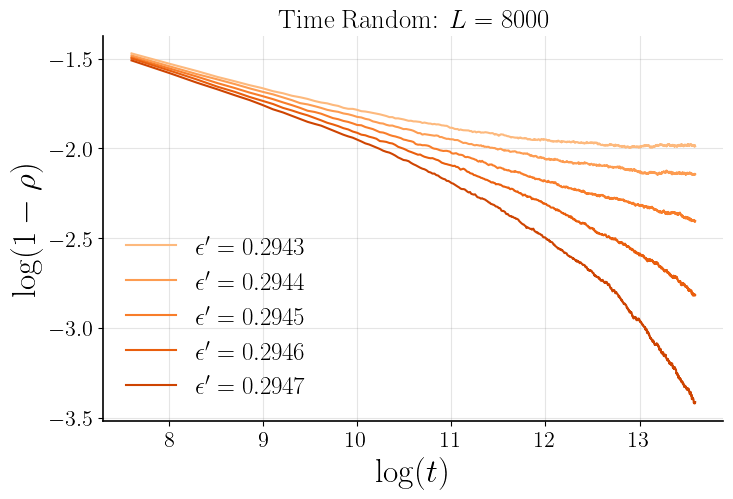

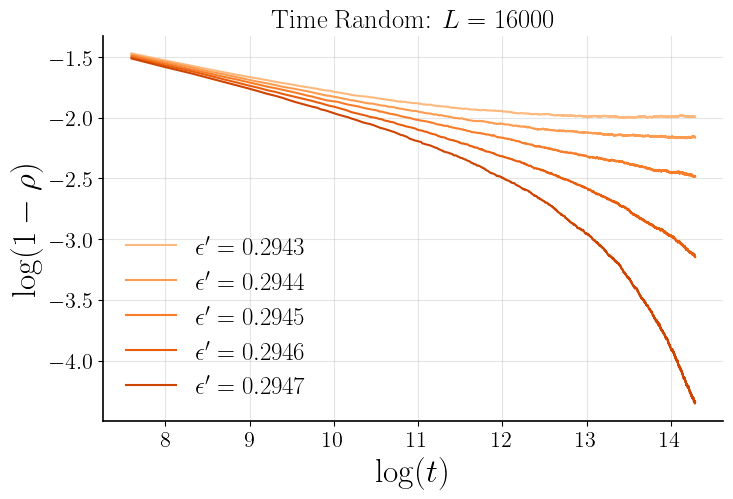

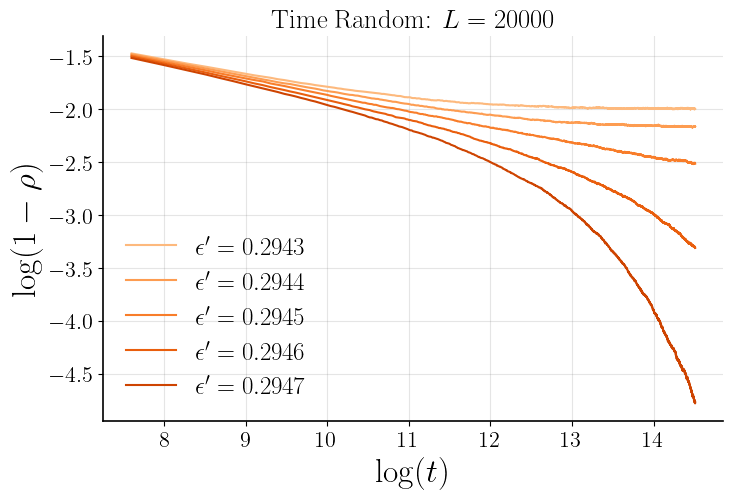

In [100]:

for j, L in enumerate(L_vals):
    plt.figure(figsize=(8,5))

    for i, epsilon_val in enumerate(epdilon_vals):
        c = cmap(i+3)
        time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
        log_time_vals = np.log(np.array(time_vals))
        data_to_plot = np.log(1-collected_rhos[L][epsilon_val])
        plt.plot(
            log_time_vals[200::100], 
            data_to_plot[200::100], 
            label = fr"$\epsilon' = {round(epsilon_val, ndigits=7)}$",
            # fmt='--',  
            # markersize=3,
            # marker = "o",
            # capsize=3,
            c=c
            )
    # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
    plt.title(fr"Time Random: $L = {L}$")
    plt.xlabel(r"$\log(t)$")
    plt.ylabel(r"$\log(1 - \rho)$")
    plt.legend()

    plt.show()


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_95143/4089697113.py:13: RuntimeWarning: divide by zero encountered in divide
  np.log((1/np.array(time_vals))[1:]),


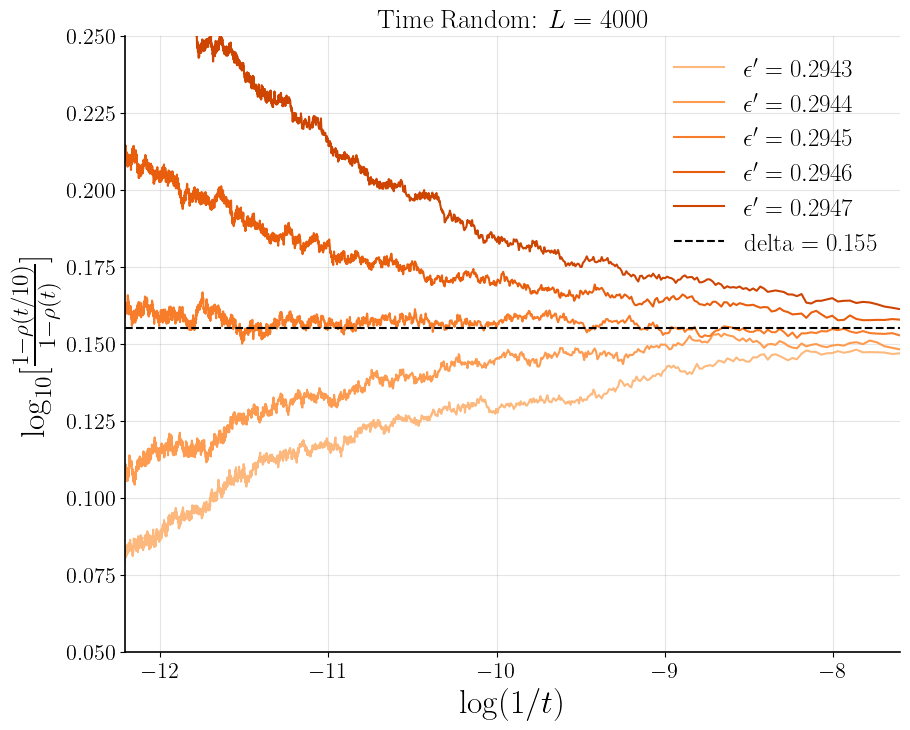

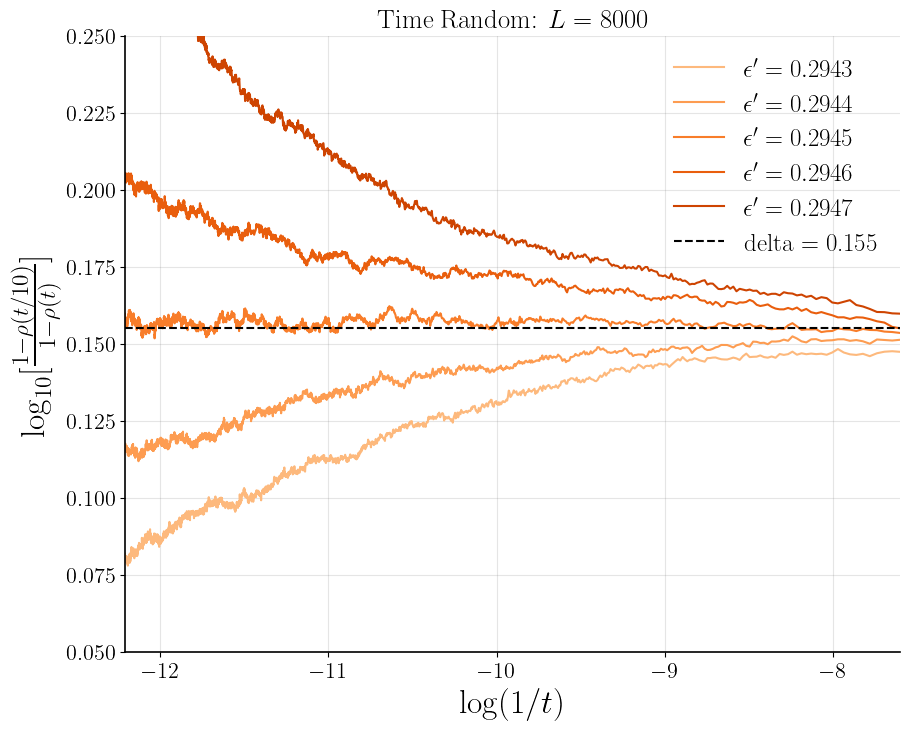

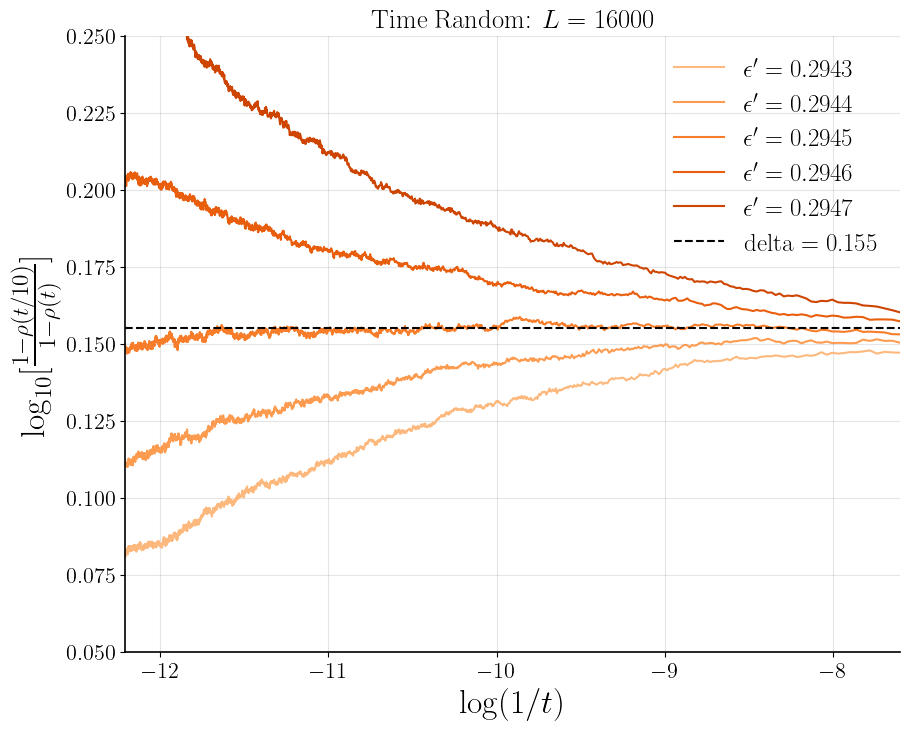

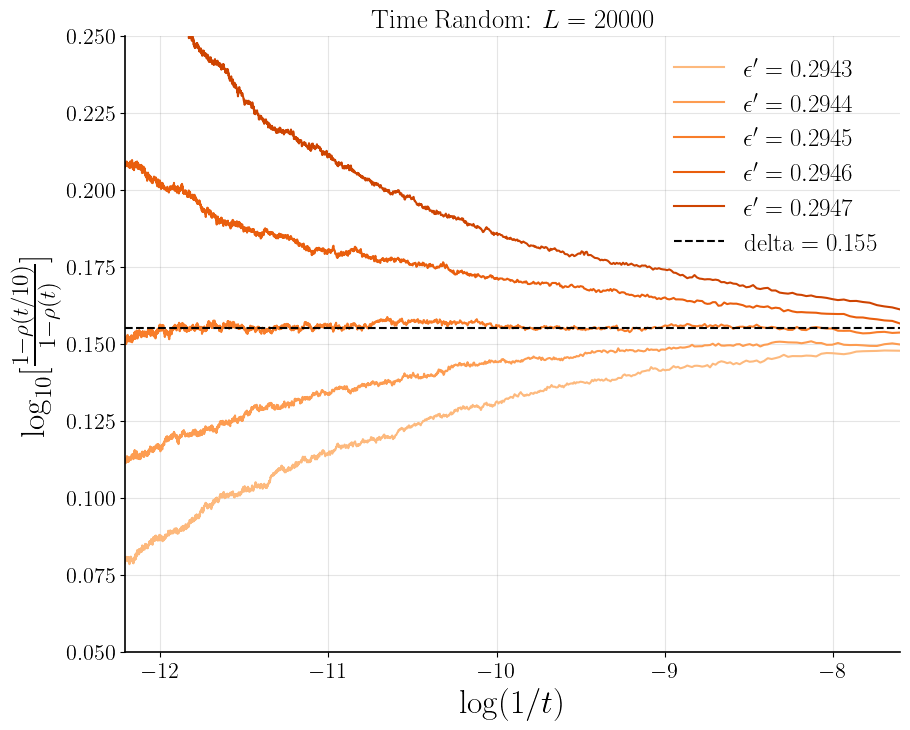

In [101]:
b = 10
for j, L in enumerate(L_vals):
    plt.figure(figsize=(10,8))
    for i, epsilon_val in enumerate(epdilon_vals):
        c = cmap(i+3)
        time_vals = [i * time_step*time_step for i in range(0, L*time_prefact // (time_step * time_step))]
        data_to_plot = 1-collected_rhos[L][epsilon_val]
        data_to_plot_numerator = np.array([data_to_plot[(i*time_step)//b] for i in range(0, len(data_to_plot))])
        data_to_plot_denomenator = np.array([data_to_plot[i*b] for i in range(0, len(data_to_plot)//(b))])
        data_to_plot = log_b(data_to_plot_numerator[:len(data_to_plot_denomenator)]/data_to_plot_denomenator, 10)
        time_vals = [i * time_step * b for i in range(0, L*time_prefact // (time_step * time_step))]
        plt.plot(
            np.log((1/np.array(time_vals))[1:]), 
            data_to_plot[1:], 
            label = fr"$\epsilon' = {epsilon_val}$",
            # fmt='--',  
            # markersize=3,
            # marker = "o",
            # capsize=3,
            c=c
            )
    
    delta_guess = 0.155
    plt.axhline(delta_guess, c = 'k', label=f"delta = {delta_guess}", linestyle ="--")
    plt.title(fr"Time Random: $L = {L}$")
    plt.xlabel(r"$\log(1/t)$")
    plt.ylabel(r"$\log_{10}[\frac{1-\rho(t/10)}{1-\rho(t)}]$")
    plt.legend()
    plt.xlim((np.log(0.000005), np.log(0.0005)))
    plt.ylim((0.05, 0.25))

    plt.show()

In [224]:
found_delta = 0.155
epsilon_c = 0.29451

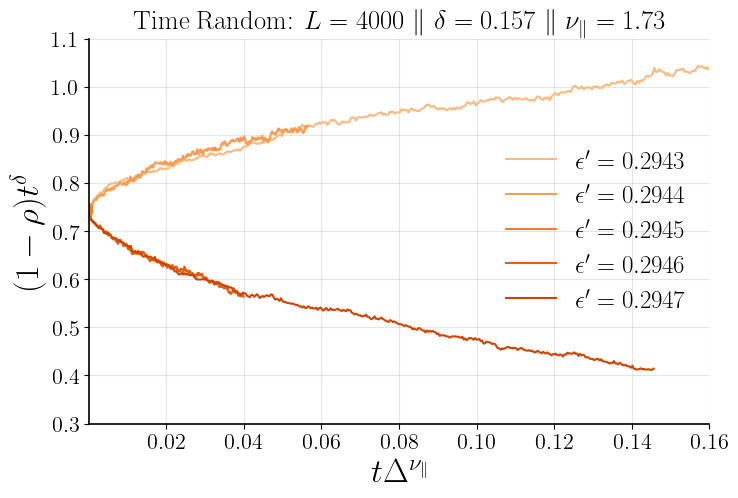

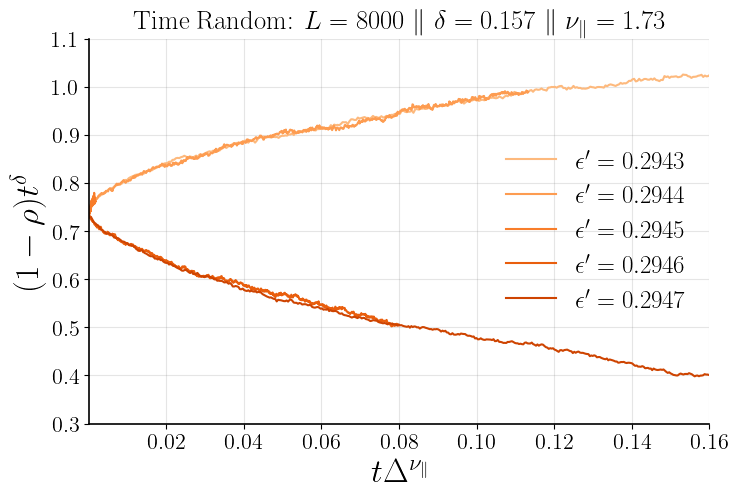

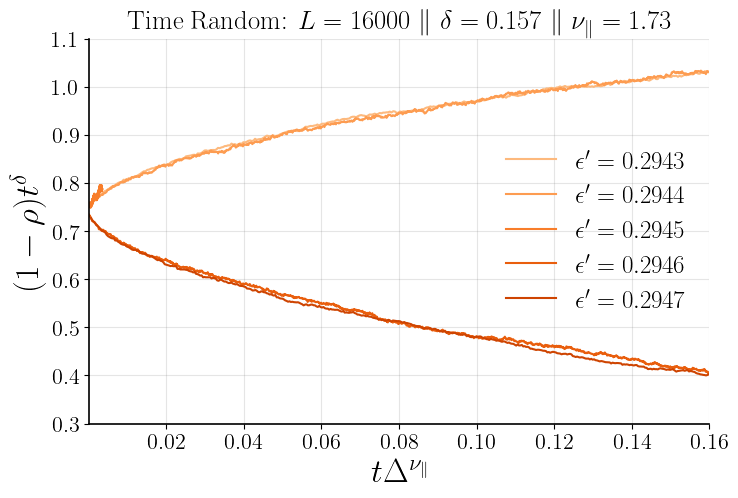

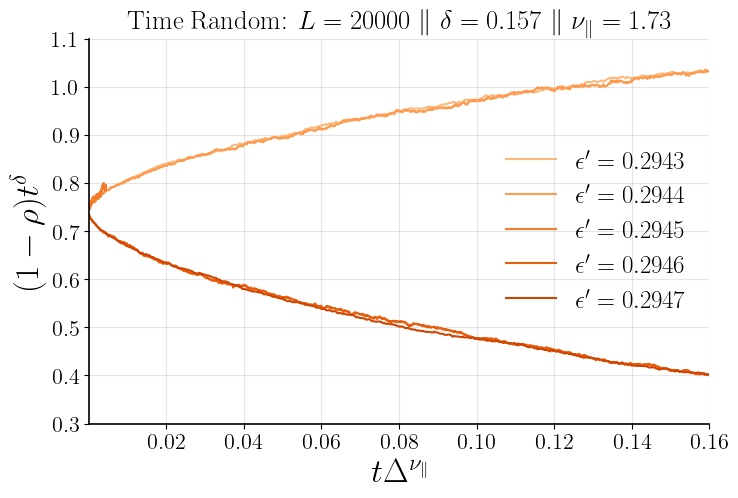

In [229]:
delta_guess = 0.157
guess_nu_par = 1.73
for j, L in enumerate(L_vals):
    plt.figure(figsize=(8,5))
    for i, epsilon_val in enumerate(epdilon_vals):
        if epsilon_val == epsilon_c:
            continue
        c = cmap(i+3)
        time_vals = np.array([i * time_step for i in range(0, L*time_prefact // time_step)])
        orig_data = 1-collected_rhos[L][epsilon_val]
        plt.plot(
            (time_vals*(abs(epsilon_val - epsilon_c))**(guess_nu_par))[200::100], 
            (orig_data * time_vals ** delta_guess)[200::100], 
            label = fr"$\epsilon' = {epsilon_val}$",
            # fmt='--',  
            # markersize=3,
            # marker = "o",
            # capsize=3,
            c=c
            )
    
    # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
    plt.title(fr"Time Random: $L = {L}$ $\|$ $\delta = {delta_guess}$ $\|$ $\nu_{{\|}} = {guess_nu_par}$")
    plt.xlabel(r"$t\Delta^{\nu_{\|}}$")
    plt.ylabel(r"$(1 - \rho)t^\delta$")
    plt.legend()
    plt.xlim(0.0003, 0.16)
    plt.ylim(0.3, 1.1)

    plt.show()

### Seeking z

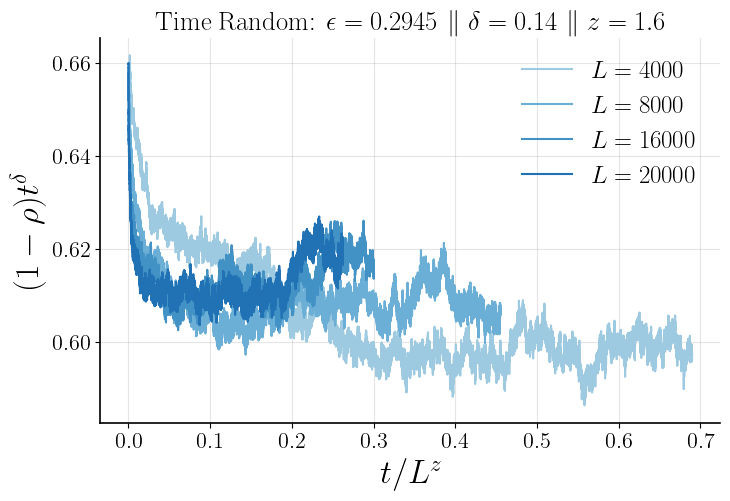

In [295]:
epsilon_c = 0.2945
z_guess = 1.6
found_delta = 0.14

plt.figure(figsize=(8,5))
for j, L in enumerate(L_vals):
    c = cmap2(j+3)
    time_vals = np.array([i * time_step for i in range(0, L*time_prefact // time_step)])
    orig_data = 1-collected_rhos[L][epsilon_c]
    plt.plot(
        (time_vals/(L ** z_guess))[100::], 
        (orig_data * time_vals ** found_delta)[100::], 
        label = fr"$L = {L}$",
        # fmt='--',  
        # markersize=3,
        # marker = "o",
        # capsize=3,
        c=c
        )

# plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
plt.title(fr"Time Random: $\epsilon = {epsilon_c}$ $\|$ $\delta = {found_delta}$ $\|$ $z = {z_guess}$")
plt.xlabel(r"$t/L^z$")
plt.ylabel(r"$(1 - \rho)t^\delta$")
plt.legend()
# plt.xlim(0.000, 0.01)
# plt.ylim(0.7, 0.77)

plt.show()